# TOC
0. [Table of Content](#TOC)
1. [Normoxic Data](#1.-Normoxic-(21%-O2))
2. [Hypoxic (15%) Data](#2.-Hypoxic-(15%-O2))
3. [Hypoxic (12%) Data](#3.-Hypoxic-(12%-O2))
4. [Comparisons](#4.-Comparisons)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import researchpy as rp
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import numpy as np
from scipy.stats import normaltest, shapiro
from statsmodels.stats.anova import AnovaRM

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('data.csv', sep=',', header=0)
df.head()

,Subject,Chamber O2,Duration,Sats,O2,CO2,R Flow,FiO2,FiCO2,R vol,R rate,R tidal,Compression Depth,Compression Rate,EtO2,EtCO2,Comment
0,AM1,21%,910,97.0,18.4,2.0,0.21,21.2,0.0,0.23,19,1.29,0.0,0,15.5,4.8,Enter Chamber
1,AM1,21%,50,90.6,18.5,2.0,0.33,21.1,0.0,0.25,32,1.26,64.8,116,15.5,4.9,Compressions
2,AM1,21%,9,94.9,17.9,2.3,0.32,21.1,0.0,0.39,16,1.32,0.0,0,14.4,5.1,Breaths
3,AM1,21%,51,88.7,18.3,1.9,0.34,21.1,0.0,0.29,27,1.56,64.7,114,14.7,5.0,Compressions
4,AM1,21%,18,93.8,17.9,2.2,0.33,21.1,0.0,0.33,17,1.37,0.0,0,14.1,5.1,Breaths


In [4]:
df['Subject'].replace(['AM1', 'AM2', 'AM3', 'PM1', 'PM2', 'PM3'], [1, 2, 3, 4, 5, 6], inplace=True)
df['Chamber O2'].replace(['21%', '15%', '12%'], [21, 15, 12], inplace=True)
df['Comment'].replace({'Enter Chamber':1, 'Compressions':2, 'Breaths':3, 'Start Recovery':4,'End':5}, inplace=True)

In [5]:
df['Compression Rate'].where(~(df['Compression Rate'] >200), other=0, inplace=True)
df.describe()

,Subject,Chamber O2,Duration,Sats,O2,CO2,R Flow,FiO2,FiCO2,R vol,R rate,R tidal,Compression Depth,Compression Rate,EtO2,EtCO2,Comment
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,3.496203,16.010127,110.551899,85.604304,12.723544,2.445823,0.368152,16.295190,0.128101,0.421139,22.870886,1.617544,32.913418,47.405063,9.765316,4.973165,2.584810
std,1.710482,3.745711,250.794138,10.736607,3.972709,0.403728,0.171729,3.707572,0.111041,0.220115,6.855731,0.812310,37.069932,53.532361,3.928942,0.559903,0.827676
min,1.000000,12.000000,8.000000,44.000000,6.700000,0.200000,0.020000,12.000000,0.000000,0.040000,9.000000,0.200000,0.000000,0.000000,4.100000,1.000000,1.000000
25%,2.000000,12.000000,10.000000,79.750000,9.000000,2.250000,0.265000,12.300000,0.000000,0.270000,18.000000,1.085000,0.000000,0.000000,6.300000,4.900000,2.000000
50%,3.000000,15.000000,49.000000,89.000000,11.600000,2.500000,0.340000,15.400000,0.100000,0.370000,21.000000,1.440000,0.000000,0.000000,8.600000,5.100000,2.000000
75%,5.000000,21.000000,50.000000,93.250000,17.600000,2.700000,0.450000,21.200000,0.200000,0.510000,26.000000,1.890000,70.550000,103.000000,14.500000,5.200000,3.000000
max,6.000000,21.000000,1017.000000,99.000000,20.600000,3.400000,1.220000,21.300000,0.400000,1.520000,54.000000,6.640000,136.800000,163.000000,20.300000,5.800000,5.000000


In [6]:
breaths_df = df[df['Comment']==3]
compres_df = df[df['Comment']==2]

In [7]:
breath_drop_lst = ['Chamber O2', 'FiCO2', 'Comment', 'Subject', 'Compression Depth', 'Compression Rate']
compres_drop_lst = ['Chamber O2', 'FiCO2', 'Comment', 'Subject']
zeros_data_lst = ['Chamber O2', 'FiCO2', 'Comment', 'Subject']

## 1. Subjects

In [8]:
subject_data = pd.read_csv('subjects.csv')
subject_data

,Age,Weight,Height
0,26,59.0,163
1,25,75.5,178
2,22,82.5,183
3,22,57.5,161
4,27,82.0,178
5,22,60.0,165


In [9]:
rp.summary_cont(subject_data)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,6.0,24.0000,2.2804,0.9309,21.6069,26.3931
1,Weight,6.0,69.4167,11.8803,4.8501,56.9491,81.8843
2,Height,6.0,171.3333,9.3950,3.8355,161.4738,181.1928


## 1. Normoxic (21% O2)

In [10]:
normoxic_df = df[df['Chamber O2'] == 21]

In [11]:
rp.summary_cont(normoxic_df.drop(zeros_data_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,132.0,112.6136,258.8518,22.5302,68.0436,157.1837
1,Sats,132.0,92.6765,8.7943,0.7654,91.1623,94.1908
2,O2,132.0,17.9409,0.5007,0.0436,17.8547,18.0271
3,CO2,132.0,2.3871,0.4245,0.0369,2.3140,2.4602
4,R Flow,132.0,0.3123,0.1054,0.0092,0.2941,0.3304
5,FiO2,132.0,21.1818,0.0406,0.0035,21.1748,21.1888
6,R vol,132.0,0.3692,0.1697,0.0148,0.3399,0.3984
7,R rate,132.0,22.7500,6.5771,0.5725,21.6175,23.8825
8,R tidal,132.0,1.4336,0.5570,0.0485,1.3377,1.5295
9,Compression Depth,132.0,32.6447,37.8269,3.2924,26.1315,39.1579


In [12]:
normoxic_breaths = normoxic_df[normoxic_df['Comment']==3]
normoxic_compres = normoxic_df[normoxic_df['Comment']==2]

### Compression Analysis

In [13]:
rp.summary_cont(normoxic_compres.drop(compres_drop_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,60.0,50.1000,6.1111,0.7889,48.5213,51.6787
1,Sats,60.0,93.5633,4.2548,0.5493,92.4642,94.6625
2,O2,60.0,18.0533,0.2831,0.0366,17.9802,18.1265
3,CO2,60.0,2.3183,0.2646,0.0342,2.2500,2.3867
4,R Flow,60.0,0.3510,0.0719,0.0093,0.3324,0.3696
5,FiO2,60.0,21.1783,0.0415,0.0054,21.1676,21.1891
6,R vol,60.0,0.3323,0.1135,0.0147,0.3030,0.3617
7,R rate,60.0,26.3000,6.2173,0.8026,24.6939,27.9061
8,R tidal,60.0,1.4757,0.5080,0.0656,1.3444,1.6069
9,Compression Depth,60.0,71.7800,17.9311,2.3149,67.1479,76.4121


In [14]:
normoxic_compres.drop(compres_drop_lst, axis=1).describe()

,Duration,Sats,O2,CO2,R Flow,FiO2,R vol,R rate,R tidal,Compression Depth,Compression Rate,EtO2,EtCO2
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,50.100000,93.563333,18.053333,2.318333,0.351000,21.178333,0.332333,26.300000,1.475667,71.780000,110.616667,14.873333,5.115000
std,6.111118,4.254807,0.283122,0.264570,0.071939,0.041545,0.113487,6.217253,0.508038,17.931081,11.140233,0.326702,0.354068
min,19.000000,78.800000,17.300000,1.700000,0.190000,21.100000,0.150000,14.000000,0.740000,48.400000,89.000000,14.300000,4.200000
25%,49.000000,89.575000,17.900000,2.100000,0.300000,21.200000,0.257500,21.000000,1.097500,55.400000,99.000000,14.700000,4.900000
50%,50.000000,94.700000,18.000000,2.400000,0.340000,21.200000,0.310000,26.000000,1.380000,70.150000,116.000000,14.900000,5.200000
75%,51.000000,97.250000,18.200000,2.500000,0.410000,21.200000,0.360000,31.000000,1.672500,83.475000,119.250000,15.000000,5.400000
max,65.000000,99.000000,18.700000,2.900000,0.530000,21.200000,0.750000,38.000000,2.690000,136.800000,125.000000,15.800000,5.600000


### Breaths Analysis

In [15]:
rp.summary_cont(normoxic_breaths.drop(breath_drop_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,54.0,10.3704,1.4832,0.2018,9.9655,10.7752
1,Sats,54.0,94.6426,3.2592,0.4435,93.7530,95.5322
2,O2,54.0,17.6778,0.3300,0.0449,17.5877,17.7679
3,CO2,54.0,2.5593,0.3056,0.0416,2.4758,2.6427
4,R Flow,54.0,0.3211,0.0970,0.0132,0.2946,0.3476
5,FiO2,54.0,21.1833,0.0423,0.0058,21.1718,21.1949
6,R vol,54.0,0.4483,0.1972,0.0268,0.3945,0.5022
7,R rate,54.0,18.8889,3.2018,0.4357,18.0150,19.7628
8,R tidal,54.0,1.5270,0.5809,0.0791,1.3685,1.6856
9,EtO2,54.0,14.4630,0.3361,0.0457,14.3712,14.5547


In [16]:
normoxic_breaths.drop(breath_drop_lst, axis=1).describe()

,Duration,Sats,O2,CO2,R Flow,FiO2,R vol,R rate,R tidal,EtO2,EtCO2
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,10.370370,94.642593,17.677778,2.559259,0.321111,21.183333,0.448333,18.888889,1.527037,14.462963,5.259259
std,1.483193,3.259158,0.330047,0.305619,0.097044,0.042337,0.197176,3.201808,0.580912,0.336068,0.341207
min,8.000000,84.500000,16.900000,2.000000,0.130000,21.100000,0.060000,10.000000,0.560000,13.700000,4.600000
25%,10.000000,93.575000,17.425000,2.300000,0.240000,21.200000,0.300000,17.000000,1.100000,14.225000,5.025000
50%,10.000000,95.350000,17.700000,2.550000,0.320000,21.200000,0.425000,19.000000,1.405000,14.500000,5.300000
75%,11.000000,97.275000,17.900000,2.775000,0.367500,21.200000,0.600000,21.000000,1.812500,14.675000,5.500000
max,18.000000,99.000000,18.400000,3.400000,0.650000,21.300000,1.050000,30.000000,3.670000,15.300000,5.800000


## 2. Hypoxic (15% O2)
These conditions simulate similar O2 levels to those seen at 8000ft (equavelent to the average cabin pressure on a commercial flight

In [17]:
hypoxic_15_df = df[df['Chamber O2'] == 15]

In [18]:
rp.summary_cont(hypoxic_15_df.drop(zeros_data_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,132.0,108.4621,242.0829,21.0706,66.7794,150.1448
1,Sats,132.0,86.9856,9.1845,0.7994,85.4042,88.5670
2,O2,132.0,11.6917,0.5481,0.0477,11.5973,11.7860
3,CO2,132.0,2.4121,0.3942,0.0343,2.3442,2.4800
4,R Flow,132.0,0.4328,0.2320,0.0202,0.3929,0.4727
5,FiO2,132.0,15.4439,0.0990,0.0086,15.4269,15.4610
6,R vol,132.0,0.4798,0.2971,0.0259,0.4287,0.5310
7,R rate,132.0,24.8712,7.7266,0.6725,23.5408,26.2016
8,R tidal,132.0,1.8380,1.1389,0.0991,1.6419,2.0341
9,Compression Depth,132.0,32.8030,36.5595,3.1821,26.5081,39.0980


In [19]:
hypo_15_breaths = hypoxic_15_df[hypoxic_15_df.Comment == 3]
hypo_15_compres = hypoxic_15_df[hypoxic_15_df.Comment == 2]

### Compression Analysis

In [20]:
rp.summary_cont(hypo_15_compres.drop(compres_drop_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,60.0,50.1833,7.5789,0.9784,48.2255,52.1412
1,Sats,60.0,86.5483,8.6343,1.1147,84.3179,88.7788
2,O2,60.0,11.8083,0.3729,0.0481,11.7120,11.9047
3,CO2,60.0,2.3267,0.2622,0.0339,2.2589,2.3944
4,R Flow,60.0,0.4587,0.2015,0.0260,0.4066,0.5107
5,FiO2,60.0,15.4450,0.0852,0.0110,15.4230,15.4670
6,R vol,60.0,0.4282,0.2401,0.0310,0.3661,0.4902
7,R rate,60.0,29.4500,7.6189,0.9836,27.4818,31.4182
8,R tidal,60.0,1.7592,1.0607,0.1369,1.4851,2.0332
9,Compression Depth,60.0,72.1017,9.3941,1.2128,69.6749,74.5284


In [21]:
hypo_15_compres.drop(compres_drop_lst, axis=1).describe()

,Duration,Sats,O2,CO2,R Flow,FiO2,R vol,R rate,R tidal,Compression Depth,Compression Rate,EtO2,EtCO2
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000
mean,50.183333,86.548333,11.808333,2.326667,0.458667,15.445000,0.428167,29.450000,1.759167,72.101667,95.783333,8.65000,4.985000
std,7.578944,8.634293,0.372937,0.262237,0.201532,0.085222,0.240109,7.618944,1.060745,9.394057,19.927063,0.46596,0.276678
min,14.000000,60.100000,11.300000,1.800000,0.140000,15.300000,0.120000,18.000000,0.490000,53.200000,0.000000,7.60000,3.800000
25%,49.000000,86.550000,11.600000,2.200000,0.305000,15.400000,0.240000,25.000000,1.055000,63.050000,91.000000,8.30000,4.875000
50%,50.000000,90.200000,11.700000,2.300000,0.460000,15.400000,0.355000,28.500000,1.440000,72.650000,101.000000,8.75000,5.000000
75%,51.000000,91.625000,11.925000,2.500000,0.552500,15.500000,0.522500,31.250000,2.105000,78.275000,105.000000,8.90000,5.200000
max,87.000000,94.300000,12.700000,2.800000,1.010000,15.600000,1.060000,54.000000,4.670000,93.600000,117.000000,10.10000,5.500000


### Breaths Analysis

In [22]:
rp.summary_cont(hypo_15_breaths.drop(breath_drop_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,54.0,10.7778,2.2957,0.3124,10.1512,11.4044
1,Sats,54.0,89.3204,3.8206,0.5199,88.2775,90.3632
2,O2,54.0,11.4944,0.4444,0.0605,11.3731,11.6157
3,CO2,54.0,2.5426,0.3418,0.0465,2.4493,2.6359
4,R Flow,54.0,0.4548,0.2707,0.0368,0.3809,0.5287
5,FiO2,54.0,15.4537,0.1145,0.0156,15.4225,15.4849
6,R vol,54.0,0.5470,0.3621,0.0493,0.4482,0.6459
7,R rate,54.0,20.8704,4.5725,0.6222,19.6223,22.1184
8,R tidal,54.0,1.9461,1.3078,0.1780,1.5891,2.3031
9,EtO2,54.0,8.3241,0.4584,0.0624,8.1989,8.4492


In [23]:
hypo_15_breaths.drop(breath_drop_lst, axis=1).describe()

,Duration,Sats,O2,CO2,R Flow,FiO2,R vol,R rate,R tidal,EtO2,EtCO2
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,10.777778,89.320370,11.494444,2.542593,0.454815,15.453704,0.547037,20.870370,1.946111,8.324074,5.100000
std,2.295744,3.820618,0.444427,0.341805,0.270686,0.114452,0.362104,4.572462,1.307816,0.458437,0.217186
min,8.000000,78.900000,10.500000,1.700000,0.130000,15.200000,0.120000,14.000000,0.530000,7.100000,4.600000
25%,10.000000,87.925000,11.225000,2.300000,0.292500,15.400000,0.312500,17.250000,1.180000,8.100000,5.000000
50%,10.000000,90.500000,11.450000,2.500000,0.355000,15.450000,0.425000,20.000000,1.445000,8.350000,5.100000
75%,11.000000,91.850000,11.675000,2.800000,0.452500,15.500000,0.602500,23.750000,2.245000,8.600000,5.275000
max,20.000000,94.800000,12.800000,3.100000,1.220000,15.800000,1.520000,34.000000,6.640000,9.100000,5.600000


## 3. Hypoxic (12% O2)
These conditions simulate similar O2 levels to those seen at 12000ft

In [24]:
hypoxic_12_df = df[df['Chamber O2'] == 12]

In [25]:
rp.summary_cont(hypoxic_12_df.drop(zeros_data_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,131.0,110.5802,253.0713,22.1109,66.8363,154.3240
1,Sats,131.0,77.0863,7.7842,0.6801,75.7407,78.4318
2,O2,131.0,8.5061,0.7956,0.0695,8.3686,8.6436
3,CO2,131.0,2.5389,0.3774,0.0330,2.4737,2.6042
4,R Flow,131.0,0.3593,0.1283,0.0112,0.3371,0.3815
5,FiO2,131.0,12.2290,0.0799,0.0070,12.2152,12.2428
6,R vol,131.0,0.4144,0.1503,0.0131,0.3884,0.4403
7,R rate,131.0,20.9771,5.5684,0.4865,20.0146,21.9396
8,R tidal,131.0,1.5807,0.5432,0.0475,1.4868,1.6746
9,Compression Depth,131.0,33.2954,37.0922,3.2408,26.8840,39.7069


In [26]:
hypo_12_breaths = hypoxic_12_df[hypoxic_12_df.Comment == 3]
hypo_12_compres = hypoxic_12_df[hypoxic_12_df.Comment == 2]

### Compression Analysis

In [27]:
rp.summary_cont(hypo_12_compres.drop(compres_drop_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,60.0,50.9500,4.9177,0.6349,49.6796,52.2204
1,Sats,60.0,77.5450,6.2245,0.8036,75.9370,79.1530
2,O2,60.0,8.5500,0.6259,0.0808,8.3883,8.7117
3,CO2,60.0,2.4817,0.1557,0.0201,2.4415,2.5219
4,R Flow,60.0,0.4012,0.1003,0.0129,0.3753,0.4271
5,FiO2,60.0,12.2350,0.0709,0.0092,12.2167,12.2533
6,R vol,60.0,0.3763,0.1067,0.0138,0.3488,0.4039
7,R rate,60.0,23.0833,4.5966,0.5934,21.8959,24.2708
8,R tidal,60.0,1.5695,0.5109,0.0660,1.4375,1.7015
9,Compression Depth,60.0,72.6467,11.2196,1.4484,69.7483,75.5450


In [28]:
hypo_12_compres.drop(compres_drop_lst, axis=1).describe()

,Duration,Sats,O2,CO2,R Flow,FiO2,R vol,R rate,R tidal,Compression Depth,Compression Rate,EtO2,EtCO2
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000
mean,50.950000,77.545000,8.550000,2.481667,0.401167,12.23500,0.376333,23.083333,1.569500,72.646667,105.683333,5.65000,4.973333
std,4.917713,6.224485,0.625855,0.155674,0.100255,0.07089,0.106738,4.596578,0.510916,11.219633,23.008099,0.72451,0.228382
min,40.000000,46.900000,7.500000,2.200000,0.180000,12.10000,0.180000,15.000000,0.800000,52.900000,0.000000,4.20000,4.400000
25%,49.750000,75.525000,8.100000,2.400000,0.327500,12.20000,0.327500,20.000000,1.320000,64.025000,100.750000,5.30000,4.900000
50%,50.000000,79.000000,8.500000,2.450000,0.425000,12.20000,0.370000,23.000000,1.505000,72.200000,111.500000,5.60000,5.000000
75%,50.000000,81.200000,9.200000,2.600000,0.480000,12.30000,0.462500,25.000000,1.745000,81.225000,114.000000,6.30000,5.125000
max,65.000000,85.100000,9.600000,2.800000,0.570000,12.30000,0.620000,37.000000,2.750000,96.700000,163.000000,6.80000,5.400000


### Breaths Analysis

In [29]:
rp.summary_cont(hypo_12_breaths.drop(breath_drop_lst, axis=1))

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Duration,54.0,10.2963,0.6904,0.0939,10.1079,10.4847
1,Sats,54.0,78.1963,5.2855,0.7193,76.7536,79.6390
2,O2,54.0,8.3056,0.5865,0.0798,8.1455,8.4656
3,CO2,54.0,2.6648,0.2960,0.0403,2.5840,2.7456
4,R Flow,54.0,0.3704,0.1209,0.0164,0.3374,0.4034
5,FiO2,54.0,12.2167,0.0947,0.0129,12.1908,12.2425
6,R vol,54.0,0.4696,0.1692,0.0230,0.4234,0.5158
7,R rate,54.0,18.8333,4.3209,0.5880,17.6540,20.0127
8,R tidal,54.0,1.7109,0.5690,0.0774,1.5556,1.8662
9,EtO2,54.0,5.4278,0.6580,0.0895,5.2482,5.6074


In [30]:
hypo_12_breaths.drop(breath_drop_lst, axis=1).describe()

,Duration,Sats,O2,CO2,R Flow,FiO2,R vol,R rate,R tidal,EtO2,EtCO2
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,10.296296,78.196296,8.305556,2.664815,0.370370,12.216667,0.469630,18.833333,1.710926,5.427778,5.068519
std,0.690355,5.285472,0.586456,0.295984,0.120861,0.094669,0.169193,4.320858,0.568985,0.658018,0.233775
min,9.000000,56.400000,7.000000,1.900000,0.140000,12.000000,0.170000,9.000000,0.800000,4.100000,4.500000
25%,10.000000,75.075000,7.825000,2.500000,0.280000,12.200000,0.327500,16.000000,1.342500,5.000000,5.000000
50%,10.000000,79.100000,8.300000,2.700000,0.370000,12.200000,0.465000,18.000000,1.710000,5.400000,5.100000
75%,11.000000,81.725000,8.800000,2.900000,0.477500,12.300000,0.600000,20.750000,2.072500,6.100000,5.200000
max,13.000000,86.300000,9.400000,3.200000,0.660000,12.400000,0.870000,34.000000,3.560000,6.400000,5.500000


## 4. Comparisons

### Compressions

#### Compression Rate

In [31]:
print(AnovaRM(data=compres_df.rename(columns={'Chamber O2':'C_O2'}), depvar='Compression Rate', subject='Subject', within=['C_O2'], aggregate_func='mean').fit())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
C_O2  9.6949 2.0000 10.0000 0.0046



In [32]:
comp_crate = mc.MultiComparison(compres_df['Compression Rate'], compres_df['Chamber O2'].replace({21:"Normoxic", 15:'8000ft', 12:'12000ft'}))
post_hoc_result_crate = comp_crate.tukeyhsd()
post_hoc_result_crate.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
12000ft,8000ft,-9.9,0.0117,-17.976,-1.824,True
12000ft,Normoxic,4.9333,0.3212,-3.1426,13.0093,False
8000ft,Normoxic,14.8333,0.001,6.7574,22.9093,True


In [33]:
comp_rate = compres_df['Compression Rate'].groupby(compres_df['Chamber O2']).mean()

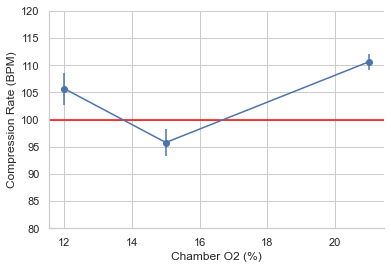

In [34]:
g = comp_rate.plot(yerr=compres_df['Compression Rate'].groupby(compres_df['Chamber O2']).sem(), marker='o', ylim=(80,120))
g.set_xlabel('Chamber O2 (%)')
g.set_ylabel('Compression Rate (BPM)')
g.axhline(100, color='red')
sns.despine()

#### Compression Depth

In [35]:
print(AnovaRM(data=compres_df.rename(columns={'Chamber O2':'C_O2'}), depvar='Compression Depth', subject='Subject', within=['C_O2'], aggregate_func='mean').fit())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
C_O2  0.0170 2.0000 10.0000 0.9832



In [36]:
comp_cdepth = mc.MultiComparison(compres_df['Compression Depth'], compres_df['Chamber O2'].replace({21:"Normoxic", 15:'8000ft', 12:'12000ft'}))
post_hoc_result_cdepth = comp_cdepth.tukeyhsd()
post_hoc_result_cdepth.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
12000ft,8000ft,-0.545,0.9,-6.3117,5.2217,False
12000ft,Normoxic,-0.8667,0.9,-6.6333,4.9,False
8000ft,Normoxic,-0.3217,0.9,-6.0883,5.445,False


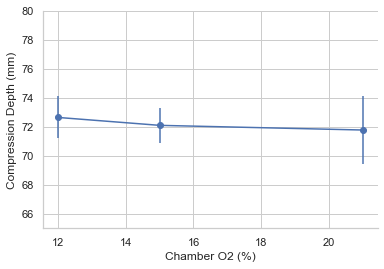

In [37]:
comp_depth = compres_df['Compression Depth'].groupby(compres_df['Chamber O2']).mean()
g = comp_depth.plot(yerr=compres_df['Compression Depth'].groupby(compres_df['Chamber O2']).sem(), marker='o', ylim=(65,80))
g.set_xlabel('Chamber O2 (%)')
g.set_ylabel('Compression Depth (mm)')
sns.despine()

### Breaths

#### End-tidal O2

In [38]:
breaths_df['EtO2'].groupby(breaths_df['Chamber O2']).mean()

Chamber O2
12     5.427778
15     8.324074
21    14.462963
Name: EtO2, dtype: float64

In [39]:
breaths_df['EtO2'].groupby(breaths_df['Chamber O2']).sem()

Chamber O2
12    0.089545
15    0.062385
21    0.045733
Name: EtO2, dtype: float64

In [40]:
print(AnovaRM(data=breaths_df.rename(columns={'Chamber O2':'C_O2'}), depvar='EtO2', subject='Subject', within=['C_O2'], aggregate_func='mean').fit())

               Anova
     F Value  Num DF  Den DF Pr > F
-----------------------------------
C_O2 629.8663 2.0000 10.0000 0.0000



In [41]:
comp_eto = mc.MultiComparison(breaths_df['EtO2'], breaths_df['Chamber O2'].replace({21:"Normoxic", 15:'8000ft', 12:'12000ft'}))
post_hoc_result_eto = comp_eto.tukeyhsd()
post_hoc_result_eto.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
12000ft,8000ft,2.8963,0.001,2.6677,3.1249,True
12000ft,Normoxic,9.0352,0.001,8.8066,9.2638,True
8000ft,Normoxic,6.1389,0.001,5.9103,6.3675,True


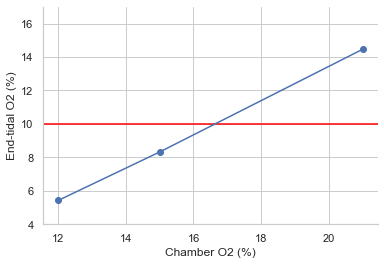

In [42]:
eto = breaths_df['EtO2'].groupby(breaths_df['Chamber O2']).mean()
g = eto.plot(yerr=breaths_df['EtO2'].groupby(breaths_df['Chamber O2']).sem(), marker='o', ylim=(4,17))
g.set_xlabel('Chamber O2 (%)')
g.set_ylabel('End-tidal O2 (%)')
g.axhline(10, color='red')
sns.despine()

The reduction of O2 levels in the chamber from 21% (normoxic) to 15% (8000ft equavalent) and to 12% produced a significant decrease in the end-tidal O2 levels. 

#### End-tidal CO2

In [43]:
breaths_df['EtCO2'].groupby(breaths_df['Chamber O2']).mean()

Chamber O2
12    5.068519
15    5.100000
21    5.259259
Name: EtCO2, dtype: float64

In [44]:
breaths_df['EtCO2'].groupby(breaths_df['Chamber O2']).sem()

Chamber O2
12    0.031813
15    0.029555
21    0.046432
Name: EtCO2, dtype: float64

In [45]:
print(AnovaRM(data=breaths_df.rename(columns={'Chamber O2':'C_O2'}), depvar='EtCO2', subject='Subject', within=['C_O2'], aggregate_func='mean').fit())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
C_O2  1.9562 2.0000 10.0000 0.1919



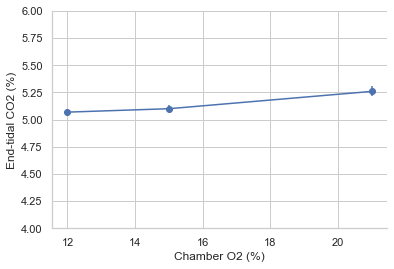

In [46]:
etco = breaths_df['EtCO2'].groupby(breaths_df['Chamber O2']).mean()
etco_sem = breaths_df['EtCO2'].groupby(breaths_df['Chamber O2']).sem()
g = etco.plot(marker='o', ylim=(4,6), yerr=etco_sem)
g.set_xlabel('Chamber O2 (%)')
g.set_ylabel('End-tidal CO2 (%)')
sns.despine()

#### Time

In [47]:
print(AnovaRM(data=breaths_df.rename(columns={'Chamber O2':'C_O2'}), depvar='Duration', subject='Subject', within=['C_O2'], aggregate_func='mean').fit())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
C_O2  0.9570 2.0000 10.0000 0.4166



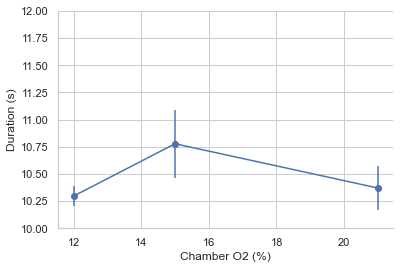

In [48]:
dur = breaths_df['Duration'].groupby(breaths_df['Chamber O2']).mean()
dur_sem = breaths_df['Duration'].groupby(breaths_df['Chamber O2']).sem()
g = dur.plot(marker='o', ylim=(10, 12),  yerr=dur_sem)
g.set_xlabel('Chamber O2 (%)')
g.set_ylabel('Duration (s)')
sns.despine()